## Length distribution comparison

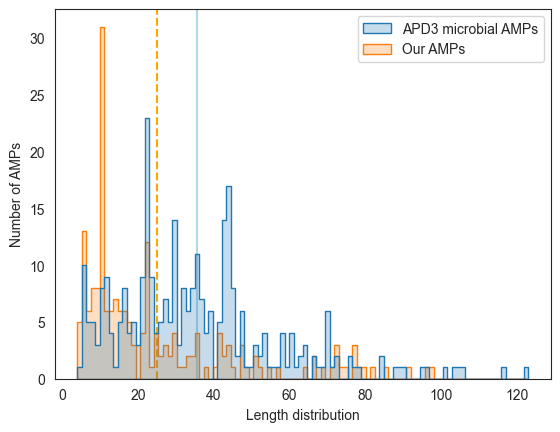

Mann-Whitney U test P-value: 5.364417021038066e-12
t-test P-value: 1.554330364949916e-07


<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind

# Input databases length distributions
apd3 = pd.read_csv("./prok_APD_sequence_release_09142020.fasta_length_complete.txt")

amps = pd.read_csv("./193_amps.pep_length_complete.txt")

both_datasets = pd.concat([apd3, amps], axis=1)

# Histogram
sns.set_style("white")
sns.histplot(
    data=both_datasets,
    bins=100,
    element="step",
    common_norm=False)
plt.xlabel("Length distribution")
plt.ylabel("Number of AMPs")

# Draw lines indicating the means
plt.axvline(x=35.49, color='lightblue', linestyle='-', zorder=0)
plt.axvline(x=24.97, color='orange', linestyle='--', zorder=0)

plt.savefig("length_distribution.svg")
plt.savefig("length_distribution.png")
plt.show()
plt.clf()


# Mann-Whitney U test and t-test 
apd3_lengths = apd3['APD3 microbial AMPs']
amps_lengths = amps['Our AMPs']

# Mann-Whitney U test
stat, p = mannwhitneyu(apd3_lengths, amps_lengths)
print('Mann-Whitney U test P-value:', p)

# t-test
stat, p = ttest_ind(apd3_lengths, amps_lengths)
print('t-test P-value:', p)

## Aminoacids composition comparison

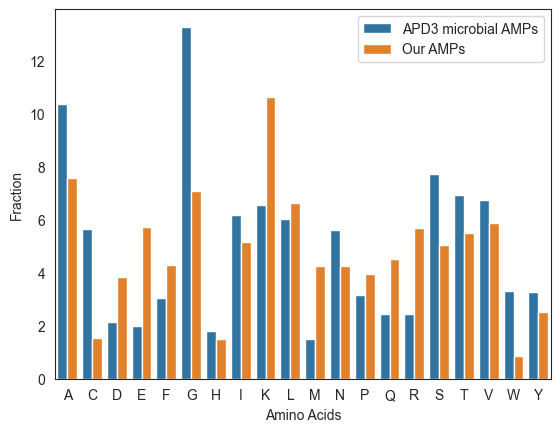

<Figure size 640x480 with 0 Axes>

In [20]:
# Input amino acid composition
both_datasets = pd.read_csv("./both_datasets_aa_composition.tsv", sep="\t")

# id_vars=[('A', 'D')], value_vars=[('B', 'E')]
both_datasets = pd.melt(
    both_datasets, id_vars="aa", value_vars=["APD3 microbial AMPs", "Our AMPs"]
)

# Barplot
sns.set_style("white")
sns.barplot(data=both_datasets, x="aa", y="value", hue="variable")
plt.legend(title="")
plt.xlabel("Amino Acids")
plt.ylabel("Fraction")
plt.savefig("aa_distribution.svg")
plt.savefig("aa_distribution.png")
plt.show()
plt.clf()

## GRAVY and net charge

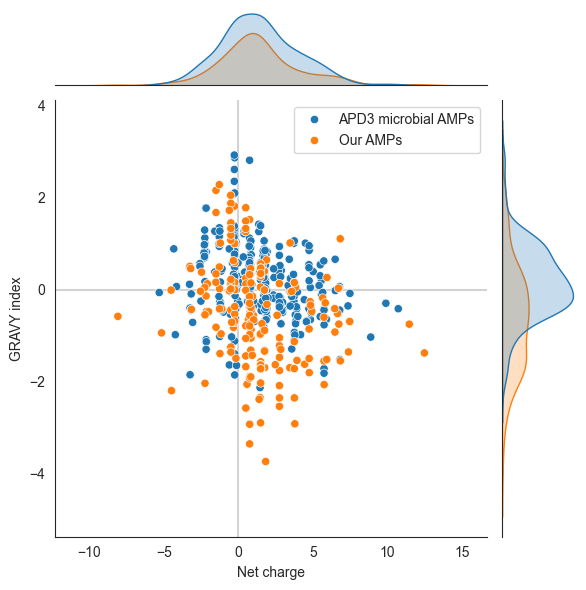

Gravy Index Mann-Whitney U test P-value: 9.333238204916738e-17
Net Charge Mann-Whitney U test P-value: 0.5556927052597123


<Figure size 640x480 with 0 Axes>

In [22]:
# Read the data
both_datasets = pd.read_csv("./both_datasets_gravy_net_charge.tsv", sep="\t")

# Jointplot with custom colors
sns.set_style("white")
sns.jointplot(data=both_datasets, x="Net charge at pH 7", y="GRAVY index", hue="group")
plt.legend(title="")
plt.xlabel("Net charge")
plt.ylabel("GRAVY index")

# Draw a line at x=0 and y=0
plt.axhline(y=0, color='lightgray', linestyle='-', zorder=0)
plt.axvline(x=0, color='lightgray', linestyle='-', zorder=0)

# Save the plot
plt.savefig("gravy_net_charge_distribution.svg")
plt.savefig("gravy_net_charge_distribution.png")
plt.show()
plt.clf()

# Mann-Whitney U test and t-test 
apd3_gravy = both_datasets[both_datasets['group'] == 'APD3 microbial AMPs']['GRAVY index']
amps_gravy = both_datasets[both_datasets['group'] == 'Our AMPs']['GRAVY index']
apd3_net = both_datasets[both_datasets['group'] == 'APD3 microbial AMPs']['Net charge at pH 7']
amps_net = both_datasets[both_datasets['group'] == 'Our AMPs']['Net charge at pH 7']

# Mann-Whitney U test
stat, p = mannwhitneyu(apd3_gravy, amps_gravy)
print('Gravy Index Mann-Whitney U test P-value:', p)
stat, p = mannwhitneyu(apd3_net, amps_net)
print('Net Charge Mann-Whitney U test P-value:', p)
